In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4


# Пропуски в данных - Missing values. Часть 3
# Интерполяция отсутствующих значений NaN

    Тема урока "Пропуски в данных (Missing values)"
    
    1-я часть - Какими бывают пропуски в данных? Изменение типа данных серии при появлении в ней NaN-элемента
    2-я часть - Обнаружение, подсчет, удаление и замена пропусков
    3-я часть (текущая) - Интерполяция (восстановление) отсутствующих значений в структурах Series и DataFrame

# 1. Термин "интерполяция". Метод interpolate() объекта Series

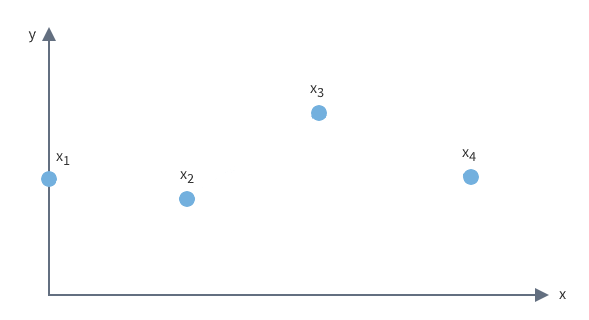

In [ ]:
Image('files/interpolation_1.png')

#### Интерполяция - это нахождение промежуточного значения между двумя известными по какому-либо алгоритму.    
    
    Термины

    Узлы интерполяции (известные точки)
    Шаг интерполяции (расстояние между соседними узлами)
    Интерполяционная сетка (совокупность узлов)

    Интерполяция позволяет узнать, какие значения принимает функция в точках, не являющихся ее узлами

_В настоящее время существует множество различных методов интерполяции. Выбор наиболее подходящего из них определяется требованием к точности, вычислительной сложности, гладкости интерполирующей функции, количеству точек данных и т.д._

#### Наиболее простым методом является ЛИНЕЙНАЯ ИНТЕРПОЛЯЦИЯ, когда предполагается, что промежуточные точки лежат на прямых, соединяющих ее узлы (как показано на рисунке).

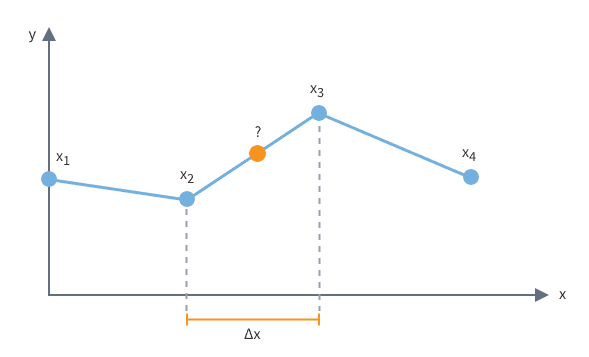

In [ ]:
Image('files/interpolation_2.png')

#### Пример 1.1

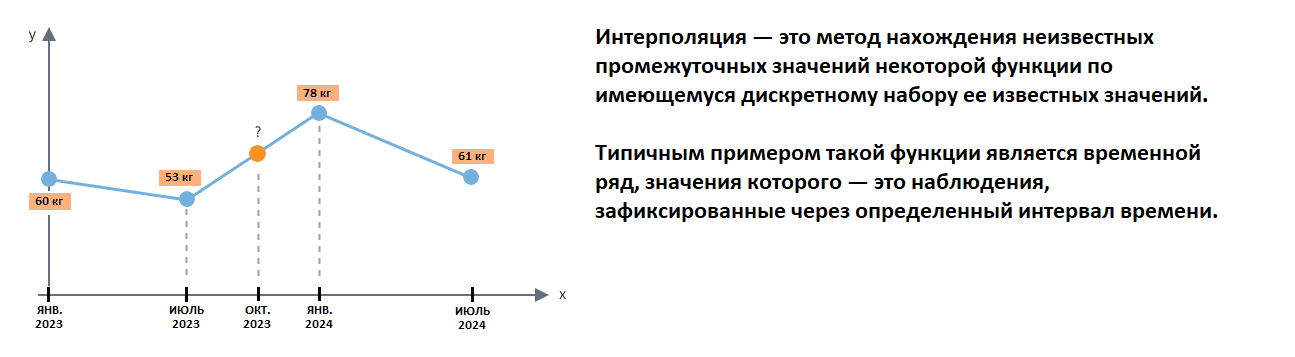

In [ ]:
Image('files/interpolation_3.png')

    ВАЖНО! В примерах 1.1, 1.2 и 1.3 мы пользуемся самой обычной интерполяцией
    Метки каждой из серий - это просто СТРОКОВЫЕ значения, а НЕ временные метки, выраженные в типе данных datetime
    
    Далее я приведу пример использования метода interpolate с опорой на индексы, выраженные в типе datetime:
    Series.interpolate(method='time')

In [ ]:
s_weight_1 = pd.Series([60, 53, np.nan, 78, 61],
                       index=['январь 2023','июль 2023','октябрь 2023','январь 2024','июль 2024'])
s_weight_1

январь 2023     60.0
июль 2023       53.0
октябрь 2023     NaN
январь 2024     78.0
июль 2024       61.0
dtype: float64

In [ ]:
# для заполнения пропуска по умолчанию используется метод линейной интерполяции (method='linear')
# s_weight_1.interpolate(method='linear') - эта запись дает тот же результат
# в результате получили 65.5 вместо NaN
s_weight_1.interpolate()

январь 2023     60.0
июль 2023       53.0
октябрь 2023    65.5
январь 2024     78.0
июль 2024       61.0
dtype: float64

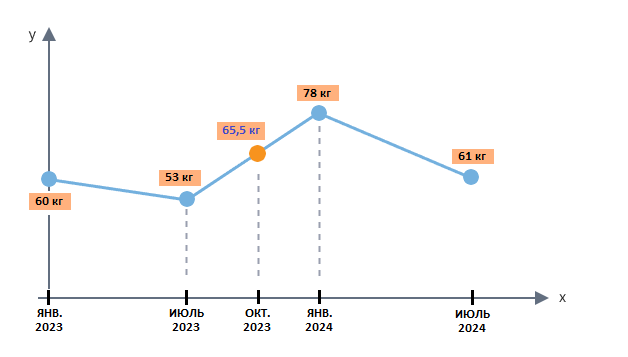

In [ ]:
Image('files/interpolation_4.png')

#### Пример 1.2

In [ ]:
s_weight_2 = pd.Series([60, 53, np.nan, np.nan, 78, 61],
                      index=['январь 2023','июль 2023','сентябрь 2023','ноябрь 2023','январь 2024','июль 2024'])
s_weight_2

январь 2023      60.0
июль 2023        53.0
сентябрь 2023     NaN
ноябрь 2023       NaN
январь 2024      78.0
июль 2024        61.0
dtype: float64

In [ ]:
# получим замены двух NaN-элементов
# теперь получаем 61,33 кг и 69,67 кг

s_weight_2.interpolate().round(2)

январь 2023      60.00
июль 2023        53.00
сентябрь 2023    61.33
ноябрь 2023      69.67
январь 2024      78.00
июль 2024        61.00
dtype: float64

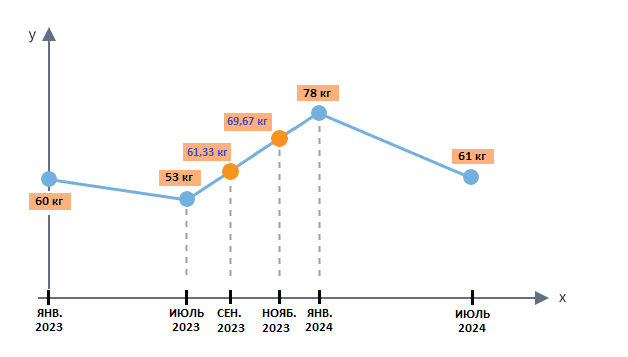

In [ ]:
Image('files/interpolation_5.png')

#### Пример 1.3

In [ ]:
# создаем еще одну серию с большим количеством NaN-элементов

s_weight_3 = pd.Series([60, np.nan, np.nan, np.nan, np.nan, np.nan, 53,
                        np.nan, np.nan, np.nan, np.nan, np.nan,
                        78, np.nan, np.nan, np.nan, np.nan, np.nan, 61],
                      index=['январь 2023','февраль 2023','март 2023','апрель 2023','май 2023','июнь 2023',
                             'июль 2023','август 2023','сентябрь 2023','октябрь 2023','ноябрь 2023','декабрь 2023',
                             'январь 2024','февраль 2024','март 2024','апрель 2024','май 2024','июнь 2024','июль 2024'])
s_weight_3

январь 2023      60.0
февраль 2023      NaN
март 2023         NaN
апрель 2023       NaN
май 2023          NaN
июнь 2023         NaN
июль 2023        53.0
август 2023       NaN
сентябрь 2023     NaN
октябрь 2023      NaN
ноябрь 2023       NaN
декабрь 2023      NaN
январь 2024      78.0
февраль 2024      NaN
март 2024         NaN
апрель 2024       NaN
май 2024          NaN
июнь 2024         NaN
июль 2024        61.0
dtype: float64

In [ ]:
# заполняем пропуски в серии с помощью линейной интерполяции
s_interpolate_result = s_weight_3.interpolate().round(2)
s_interpolate_result

январь 2023      60.00
февраль 2023     58.83
март 2023        57.67
апрель 2023      56.50
май 2023         55.33
июнь 2023        54.17
июль 2023        53.00
август 2023      57.17
сентябрь 2023    61.33
октябрь 2023     65.50
ноябрь 2023      69.67
декабрь 2023     73.83
январь 2024      78.00
февраль 2024     75.17
март 2024        72.33
апрель 2024      69.50
май 2024         66.67
июнь 2024        63.83
июль 2024        61.00
dtype: float64

## Варианты визуализации серии значений с помощью метода plot (к примеру 1.3)

<Axes: title={'center': 'Изменение веса с января 2023 г. по июль 2024 г.'}>

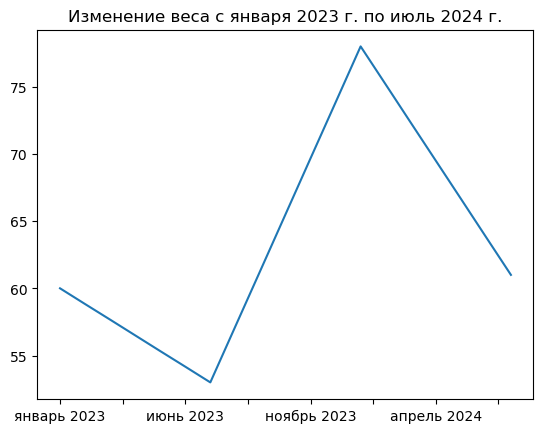

In [ ]:
# по умолчанию параметр kind='line': s_interpolate_result.plot(kind='line')
s_interpolate_result.plot(title='Изменение веса с января 2023 г. по июль 2024 г.')

<Axes: title={'center': 'Изменение веса с января 2023 г. по июль 2024 г.'}>

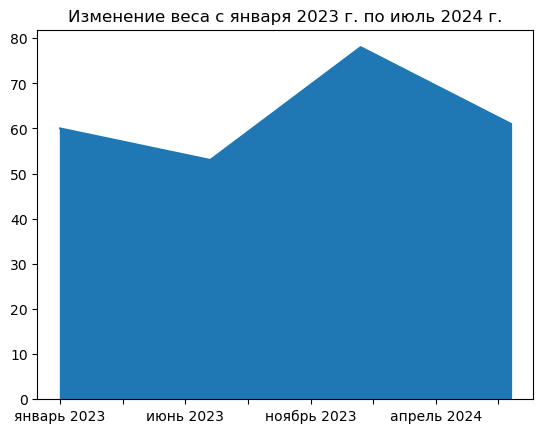

In [ ]:
s_interpolate_result.plot(kind='area', title='Изменение веса с января 2023 г. по июль 2024 г.')

<Axes: title={'center': 'Изменение веса с января 2023 г. по июль 2024 г.'}>

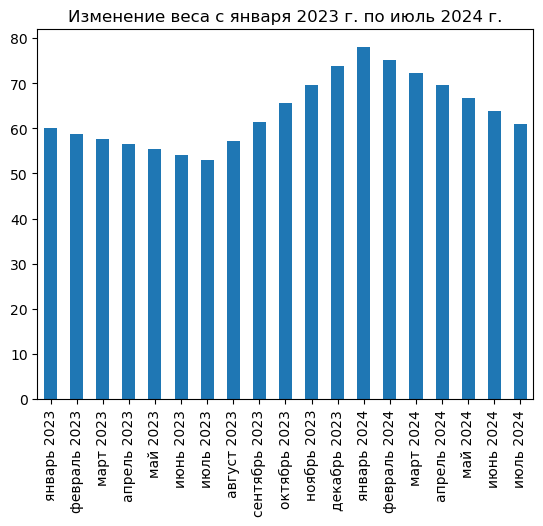

In [ ]:
s_interpolate_result.plot(kind='bar', title='Изменение веса с января 2023 г. по июль 2024 г.')

<Axes: title={'center': 'Изменение веса с января 2023 г. по июль 2024 г.'}>

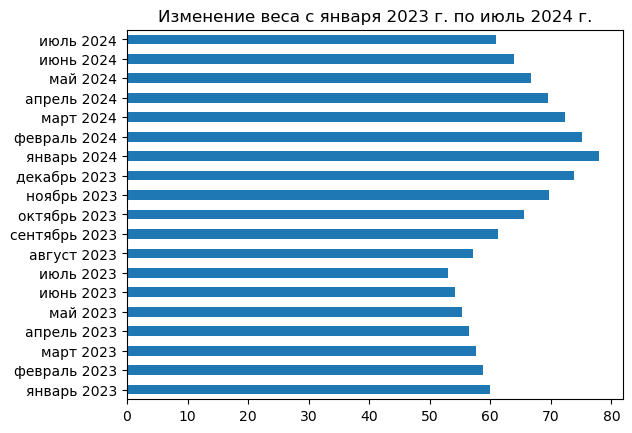

In [ ]:
s_interpolate_result.plot(kind='barh', title='Изменение веса с января 2023 г. по июль 2024 г.')

#### Важно! Про экстраполяцию

    Экстраполяция - это нахождение следующего значения по известным предыдущим по какому-либо алгоритму

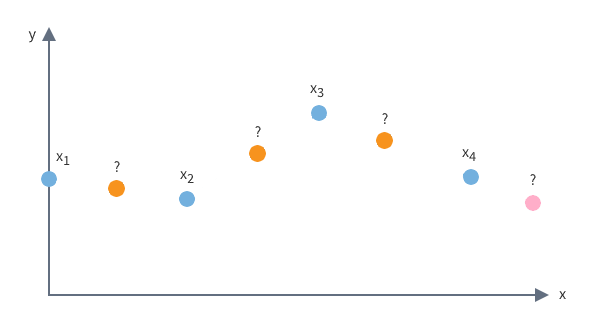

In [ ]:
Image('files/interpolation_6.png')

_Обратите внимание, что слово «экстраполяция» используется здесь для удобства. При линейной интерполяции (по умолчанию) внешние значения являются просто повторением конечных значений, а не настоящей экстраполяцией. Однако при сплайн-интерполяции, о которой речь пойдет далее, внешние значения действительно экстраполируются._

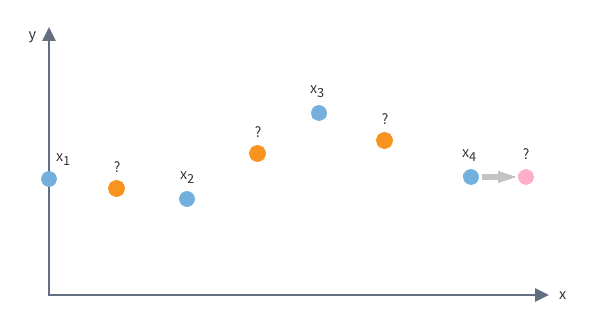

In [ ]:
Image('files/interpolation_7.png')

# 2. Метод interpolate объекта DataFrame

In [ ]:
# Создадим простой датафрейм с пропусками
# для иллюстрации дальнейших примеров расположим пропуски определенным образом

df = pd.DataFrame({'col1': [0, np.nan, np.nan, 3, 4],
                   'col2': [np.nan, 1, 2, np.nan, np.nan],
                   'col3': [4, np.nan, np.nan, 7, 10]})
df

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


## 2.1 Интерполяция NaN с аргументами по умолчанию

#### Пример 2.1

In [ ]:
# по умолчанию для каждого столбца выполняется линейная интерполяция
# для NaN внизу повторяется одно и то же значение, а NaN вверху остается неизменным
display(df, df.interpolate())

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,2.0,10.0


## 2.2. Интеполяция по строкам или по столбцам: выбор оси

#### Пример 2.2

In [ ]:
# Если axis=1, интерполяция выполняется по строке
# Для крайнего правого NaN повторяется одно и то же значение, а крайний левый NaN остается неизменным.
display(df, df.interpolate(axis=1))

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,2.0,4.0
1,NaN,1.0,1.0
2,NaN,2.0,2.0
3,3.0,5.0,7.0
4,4.0,7.0,10.0


## 2.3 Максимальное количество последовательных NaN для заполнения: limit

_По умолчанию limit=None, что означает, что все последовательные значения NaN будут интерполированы, как было показано в примере 2.1_

#### Пример 2.3

In [ ]:
# используем аргумент limit, чтобы указать максимальное количество последовательных значений NaN для интерполяции
# в результате получим только одну последовательную замену в каждом столбце
display(df, df.interpolate(limit=1))

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,NaN,10.0


## 2.4 Направление интерполяции: limit_direction

#### Пример 2.4.1

In [ ]:
# вы можете указать направление интерполяции с помощью аргумента limit_direction
# варианты ('forward' - 'вперед', 'backward'- 'назад' или 'both'- 'оба')
display(df,
        df.interpolate(limit=1, limit_direction='forward'))

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,NaN,10.0


#### Пример 2.4.2

In [ ]:
display(df,
        df.interpolate(limit=1, limit_direction='backward'))

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,1.0,4.0
1,NaN,1.0,NaN
2,2.0,2.0,6.0
3,3.0,NaN,7.0
4,4.0,NaN,10.0


#### Пример 2.4.3

In [ ]:
display(df,
        df.interpolate(limit=1, limit_direction='both'))

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,1.0,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,NaN,10.0


#### Пример 2.4.4

In [ ]:
# Установка limit_direction='both' позволяет выполнять интерполяцию с обоих концов
display(df,
        df.interpolate(limit_direction='both'))

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,NaN,7.0
4,4.0,NaN,10.0


,col1,col2,col3
0,0.0,1.0,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,2.0,10.0


## 2.5 Параметры limit_area & limit_direction

    Выбираем - интерполяция или экстраполяция значений или и то и другое
    С помощью аргумента limit_area можно указать область, которая будет интерполироваться.

    'inside': Только интерполяция
    'outside': Только экстраполяция
    None (по умолчанию): И интерполяция, и экстраполяция

#### Пример 2.5.1

In [ ]:
df.interpolate(limit_area='inside')

,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,NaN,7.0
4,4.0,NaN,10.0


#### Пример 2.5.2

In [ ]:
df.interpolate(limit_area='outside')

,col1,col2,col3
0,0.0,NaN,4.0
1,NaN,1.0,NaN
2,NaN,2.0,NaN
3,3.0,2.0,7.0
4,4.0,2.0,10.0


## 2.6 Изменение исходного объекта. Параметр inplace метода interpolate

#### Пример 2.6

In [ ]:
df_2=df.copy()
df_2.interpolate(inplace=True)
df_2

,col1,col2,col3
0,0.0,NaN,4.0
1,1.0,1.0,5.0
2,2.0,2.0,6.0
3,3.0,2.0,7.0
4,4.0,2.0,10.0


## 2.7 Метод интерполяции: параметр method

_Метод интерполяции задается первым аргументом method. По умолчанию используется значение 'linear' (линейная интерполяция)._

_Если вам нужно соединить точки не ломаной линией, а гладкой кривой, то лучше всего для этих целей подходит интерполяция квадратичными или кубическими сплайнами, т. е. отрезками квадратичных или кубических парабол._

#### SciPy — это библиотека для языка Python, основанная на расширении NumPy, но для более глубоких и сложных научных вычислений, анализа данных и построения графиков.

_SciPy предоставляет алгоритмы для оптимизации, интегрирования, интерполяции, решения задач с собственными значениями, алгебраических уравнений, дифференциальных уравнений, статистики и многих других классов задач._

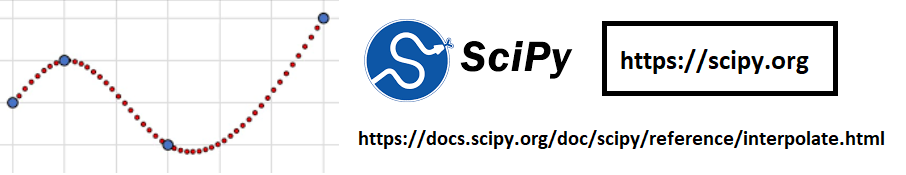

In [ ]:
Image('files/spline_example.png')

    https://scipy.org/

    https://docs.scipy.org/doc/scipy/reference/interpolate.html
    

    Существуют и другие методы интерполяции, которые можно указать в аргументе method:
    'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'polynomial',
    'piecewise_polynomial', 'from_derivatives', 'pchip', 'akima'.

    Как указано в официальной документации, это обертки для функций SciPy, включая упомянутую сплайн-интерполяцию ('spline')

## 2.7.1 method='linear'

    Метод 'linear': игнорирует индекс и рассматривает значения как равномерно распределенные.
    Это единственный метод, поддерживаемый в MultiIndex.

In [ ]:
s = pd.Series([0, np.nan, np.nan, 3],
              index=[0, 4, 6, 8])
print(s)
s.interpolate()

0    0.0
4    NaN
6    NaN
8    3.0
dtype: float64


0    0.0
4    1.0
6    2.0
8    3.0
dtype: float64

## 2.7.2 method='index' или method='values'

    При method='index' или method='values' интерполяция выполняется по значению индекса.

In [ ]:
print(s,
      s.interpolate('index'),
      s.interpolate('values'), sep='\n\n')

0    0.0
4    NaN
6    NaN
8    3.0
dtype: float64

0    0.00
4    1.50
6    2.25
8    3.00
dtype: float64

0    0.00
4    1.50
6    2.25
8    3.00
dtype: float64


_Если в качестве индексов выступают строковые значения, то без ошибки будет отрабатывать только параметр method, выставленный по умолчанию в 'linear', поскольку только в этом случае функция interpolate будет игнорировать значения индексов_

In [ ]:
s.index = list('abcd')
print(s)
s.interpolate()
s.interpolate('index')
# TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

a    0.0
b    NaN
c    NaN
d    3.0
dtype: float64


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

## 2.7.3 Сплайн-интерполяция (method='spline')

#### В математике сплайн - это функция, заданная полиномами (т.е. многочленами)

    Многочлен (или полином, от греч. πολυ- «много» + лат. nomen «имя»)
    — фундаментальное понятие в алгебре и математическом анализе.
    
    
#### Как найти порядок (order) многочлена

    Порядок(order) – это просто число степени (degree) возведения.

    Если расположить одночлены в порядке понижения их степеней,
    т.е. одночлен с наибольшей степенью возведения поставить первым,
    то порядок первого одночлена и есть порядок всего многочлена.
    

#### Пример многочлена 2-й степени. Порядок данного многочлена равен 2 (order=2):
${\displaystyle 7x^{2}+4x-8}$

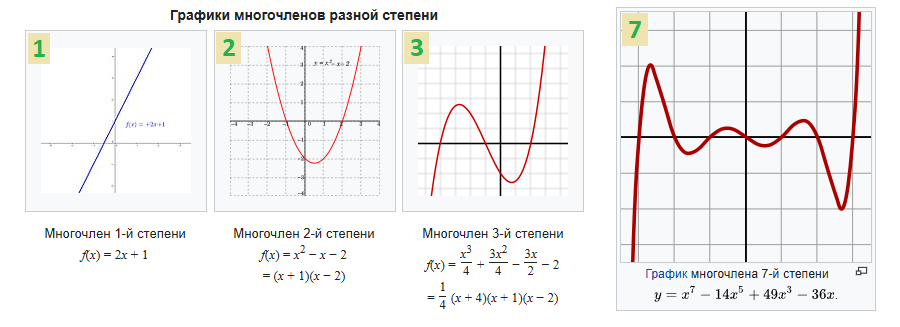

In [ ]:
Image('files/polynomials.png')

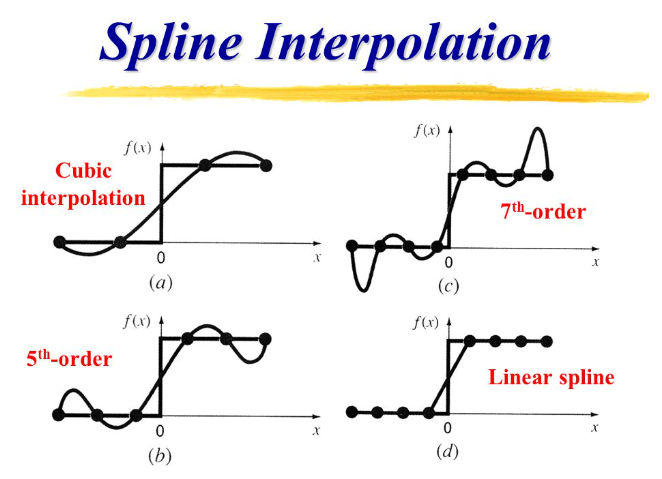

In [ ]:
Image('files/spline_examples.png')

0      0.0
2     10.0
5      NaN
6      NaN
8      4.0
12     NaN
dtype: float64

0      0.00
2     10.00
5     13.75
6     12.00
8      4.00
12   -30.00
dtype: float64


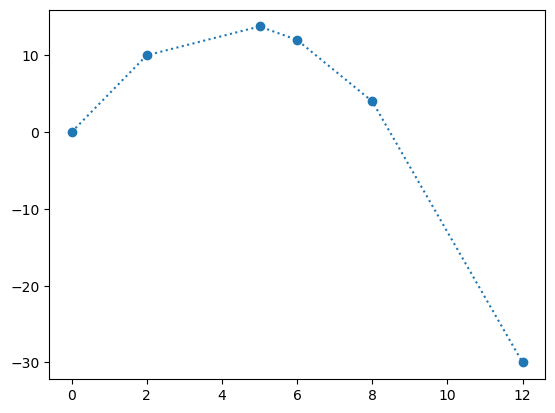

In [ ]:
import matplotlib.pyplot as plt # импортируем библиотеку для более наглядной визуализации

s = pd.Series([0, 10, np.nan, np.nan, 4, np.nan],
              index=[0, 2, 5, 6, 8, 12])
print(s, s.interpolate('spline', order=2), sep='\n\n')# обязательно указывать аргумент order
# используем инструмент plt.plot для визуализации результатов интерполяции
plt.plot(s.interpolate('spline', order=2),':o')

0     0.0
1    10.0
2     NaN
3     NaN
4     4.0
5     NaN
dtype: float64

0     0.0
1    10.0
2    14.0
3    12.0
4     4.0
5   -10.0
dtype: float64


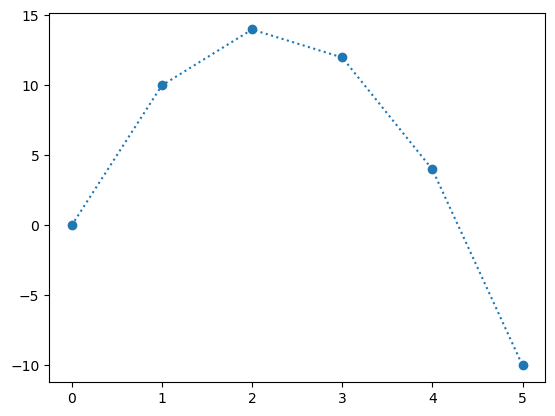

In [ ]:
# изменяем числовые индексы структуры s
s.index = range(6)
print(s, s.interpolate('spline', order=2), sep='\n\n')
# используем инструмент plt.plot для визуализации результатов интерполяции
plt.plot(s.interpolate('spline', order=2),':o')
# ':o' обозначает пунктирную линию с закрашенными точками

In [ ]:
# Сплайн-интерполяция всегда зависит от индекса
# сплайн-интерполяция требует, чтобы индекс был числовым
s.index = list('abcdef')
s
# print(s.interpolate('spline', order=2))
# ValueError: Index column must be numeric or datetime type when using spline method other than linear.
# Try setting a numeric or datetime index column before interpolating.

a     0.0
b    10.0
c     NaN
d     NaN
e     4.0
f     NaN
dtype: float64

## 2.7.3 Для данных временных рядов (method='time')

In [ ]:
print(s_weight_1,
      s_weight_1.interpolate(), sep='\n\n')

январь 2023     60.0
июль 2023       53.0
октябрь 2023     NaN
январь 2024     78.0
июль 2024       61.0
dtype: float64

январь 2023     60.0
июль 2023       53.0
октябрь 2023    65.5
январь 2024     78.0
июль 2024       61.0
dtype: float64


In [ ]:
# с помощью метода diff можно увидеть разницу между текущим (по дате) и предыдущим результатом измерения
s_weight_1.interpolate().diff()

январь 2023      NaN
июль 2023       -7.0
октябрь 2023    12.5
январь 2024     12.5
июль 2024      -17.0
dtype: float64

#### изменяем тип данных индексов структуры, создав новую серию с временными метками в переменной s_weight_time
#### дата с отсутствующим значением - 20 ноября 2023 года

In [ ]:
s_weight_time = pd.Series([60, 53, np.nan, 78, 61],
                      index=pd.to_datetime(['2023-01-01', '2023-07-01',
                                            '2023-11-20', '2024-01-01', '2024-07-01']))
print(s_weight_time,
      s_weight_time.index.dtype, # тип данных индекса серии
      s_weight_time.interpolate(), sep='\n\n')

2023-01-01    60.0
2023-07-01    53.0
2023-11-20     NaN
2024-01-01    78.0
2024-07-01    61.0
dtype: float64

datetime64[ns]

2023-01-01    60.0
2023-07-01    53.0
2023-11-20    65.5
2024-01-01    78.0
2024-07-01    61.0
dtype: float64


#### если укажем method='time', то получим более корректный результат для даты 20 ноября 2023 года - 72.29 кг

In [ ]:
s_weight_time.interpolate('time').round(2)

2023-01-01    60.00
2023-07-01    53.00
2023-11-20    72.29
2024-01-01    78.00
2024-07-01    61.00
dtype: float64

#### поставим две даты с отсутствующими значениями: 20 ноября и 31 декабря 23 года и в результате получим...
#### 72.29 кг и
#### 77.86 кг (интерполированное значение за 1 день до реального измерения веса 01.01.2024 - 78 кг.)

In [ ]:
s_weight_time2 = pd.Series([60, 53, np.nan, np.nan, 78, 61],
                      index=pd.to_datetime(['2023-01-01', '2023-07-01','2023-11-20', '2023-12-31','2024-01-01', '2024-07-01']))
print(s_weight_time2)

s_weight_time2.interpolate('time').round(2)

2023-01-01    60.0
2023-07-01    53.0
2023-11-20     NaN
2023-12-31     NaN
2024-01-01    78.0
2024-07-01    61.0
dtype: float64


2023-01-01    60.00
2023-07-01    53.00
2023-11-20    72.29
2023-12-31    77.86
2024-01-01    78.00
2024-07-01    61.00
dtype: float64

In [ ]:
# вычисляем разницу между показателями
s_weight_time2.interpolate('time').diff()

2023-01-01          NaN
2023-07-01    -7.000000
2023-11-20    19.293478
2023-12-31     5.570652
2024-01-01     0.135870
2024-07-01   -17.000000
dtype: float64